In [1]:
X = []
y = []

for line in open("iris/iris.data", "r"):
  line = line.strip()
  if line != "":
    tokens = line.split(',')
    X.append([float(t) for t in tokens[:4]])
    y.append(tokens[4])
        
y_labels = list(set(y))  
y = [y_labels.index(i) for i in y]  


In [2]:
import numpy as np  

X = np.array(X)  
y = np.array(y)

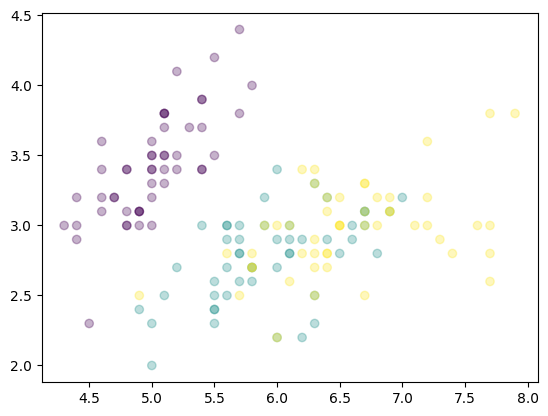

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.3)
plt.show()

In [4]:
# import random

# tmp = list(zip(X, y))
# random.shuffle(tmp)
# test = tmp[-30:]
# train = tmp[:-30]

#-------------------------------

# 위처럼 코드 구현할 수도 있음
# 사이킥 런으로 구현하면 아래와 같이 구현 가능
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [5]:
X_train.shape

(120, 4)

In [6]:
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
# print(y_train_pred)
# print(y_train)


print(sum((y_train_pred==y_train) / len(y_train)))
# 위 아래 같은 방법
print("train accuracy :", accuracy_score(y_train_pred, y_train))
print("test accuracy :", accuracy_score(y_test_pred, y_test))

0.9833333333333323
train accuracy : 0.9833333333333333
test accuracy : 0.9666666666666667


cross validation을 사용해서 최적의 k를 찾기

In [7]:
from sklearn.model_selection import cross_val_score

scores = []
test_scores = []
k_values = range(1, 31)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') # cv : fold 수
    # print(score) # 리스트 타입
    scores.append(score.mean())
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_test_pred = knn.predict(X_test)
    test_score = accuracy_score(y_test_pred, y_test)
    test_scores.append(test_score)

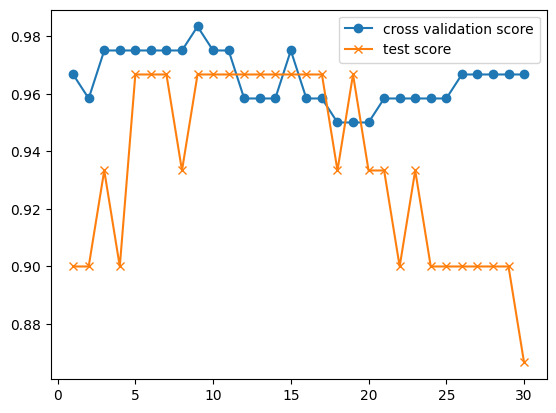

In [8]:
plt.plot(k_values, scores, "-o", label="cross validation score")
plt.plot(k_values, test_scores, "-x", label="test score")
plt.legend()
plt.show()